In [14]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Cleaning the data
# okay we have some NaNs in Age, Cabin and Embarked
# Cabin has too many NaNs so we will drop that column, and it's won't add any real value to the model later
# Embarked has only 2 NaNs so we can drop those rows
# Age has 177 NaNs, we can fill those with the midian to just avoid outliers

In [8]:
df["Age"].fillna(df["Age"].median(), inplace=True)
df.drop(columns=["Cabin"], inplace=True)
df.dropna(subset=["Embarked"], inplace=True)

C:\Users\سمرقند\AppData\Local\Temp\ipykernel_12044\4092331848.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)


In [9]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
## Data transformation
# We will create a new feature called FamilySize which is the sum of SibSp and Parch + 1 (for the person themselves)
# We will also convert the categorical variables into dummy/indicator variables

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)


In [ ]:

def min_max_normalize(df: pd.DataFrame) -> pd.DataFrame:

    result = df.copy()
    numeric_cols = result.select_dtypes(include=['int64', 'float64']).columns
    
    for col in numeric_cols:
        min_val = result[col].min()
        max_val = result[col].max()
        if min_val != max_val: # we can't devise by zero
            result[col] = (result[col] - min_val) / (max_val - min_val)
        else:
            result[col] = 0.0 
    
    return result

normalized_df = min_max_normalize(df)

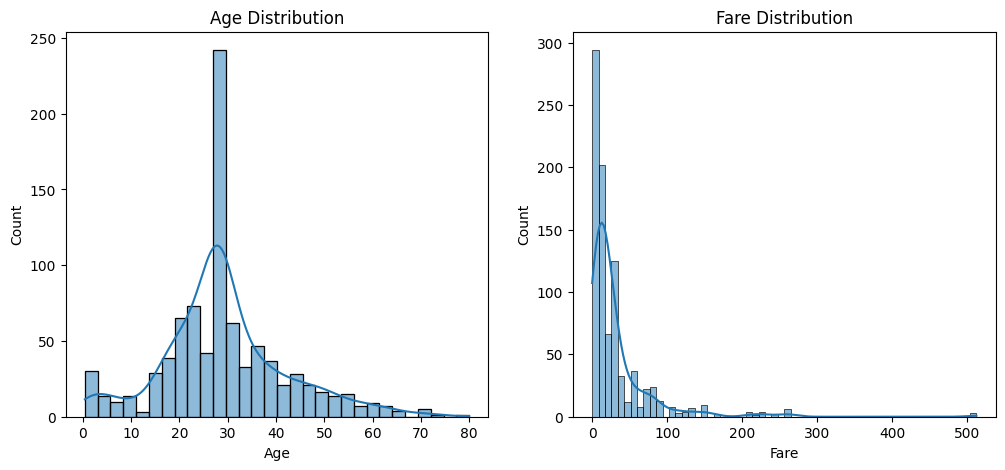

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(12,5))
sns.histplot(df['Age'], kde=True, ax=axs[0])
axs[0].set_title("Age Distribution")
sns.histplot(df['Fare'], kde=True, ax=axs[1])
axs[1].set_title("Fare Distribution")
plt.show()

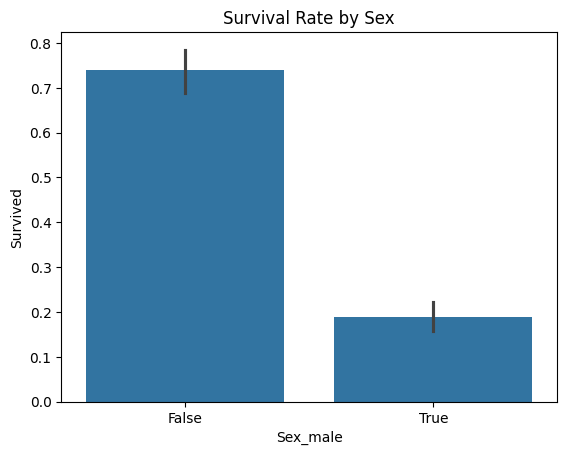

In [17]:
sns.barplot(x='Sex_male', y='Survived', data=df)
plt.title("Survival Rate by Sex")
plt.show()

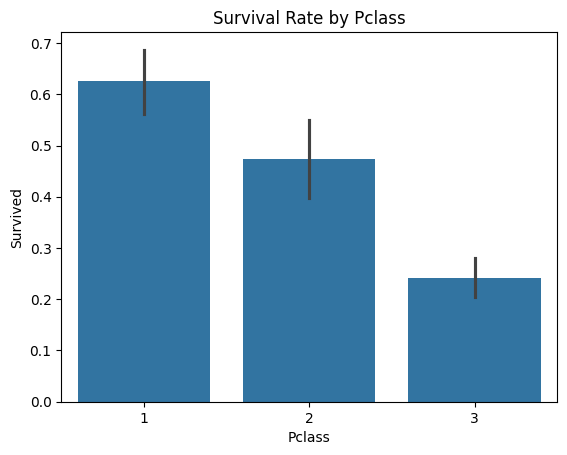

In [18]:
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title("Survival Rate by Pclass")
plt.show()

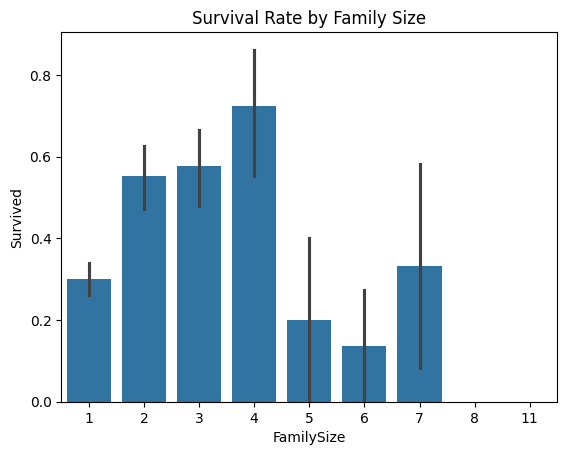

In [19]:
sns.barplot(x='FamilySize', y='Survived', data=df)
plt.title("Survival Rate by Family Size")
plt.show()

Okay here's the results 
- We actually see that if you are a girl/woman you will likely survive but poor men , they will die 
- If you have 4 members in your family that mean you will likely survive but if you have more you will likely will die
- The higher your class is, the lower your death will come :)) (pay more live longer)


In [21]:
# cleaned dataset
df.to_csv("cleaned_titanic.csv", index=False)